In [11]:
import os
import pandas as pd
data = pd.read_csv("demo.csv")
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
file_path = 'demo.csv'
# Now read the file using the detected encoding
PSE_outage = pd.read_csv(file_path, low_memory=False)

/tmp/ipykernel_145/1478925507.py:3: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("demo.csv")


In [12]:
# List of locations to refer to later
location_list = [
    "Unincorporated San Joaquin County area", "Oakland",
    "Berkeley", "Union City", "Unincorporated Alameda County area",
    "San Leandro", "Pleasanton", "Piedmont", "Livermore", "Hayward",
    "Dublin", "Cherryland", "Castro Valley", "Ashland", "Albany",
    "Tracy", "Fremont", "Fairview", "Stockton", 'Sunol',
    "San Lorenzo", "Newark", "Lathrop", "Emeryville", "Alameda"
]

In [13]:
PSE_outage

,ZIP,Native American (%),Asian American (%),African American (%),Elderly > 64 years (%),Children < 10 years (%),Hispanic (%),White (%),Pop 10-64 years (%),Total Population,...,Average Outage Duration (hours),Average Household Impacted Per Event,Outage Frequency Per Year,Projected Number of Extreme Heat Day,Census Tract Median Income,Percent of Tract below 200% Federal Poverty Level,Mean Total Average Count of Customers with Arrears >30 days,Median Total Average Count of Customers with Arrears >30 days,Mean Average Count of CARE/FERA Customers with Arrears >30 days,Mean Average Count of NON-CARE/FERA Customers with Arrears >30 days
0,94501,0.48,14.46,1.38,20.30,9.71,16.10,64.15,69.99,4472,...,NaN,NaN,Unknown,7,70893.0,NaN,4144.25,3587.5,727.25,3416.75
1,94501,0.48,14.46,1.38,20.30,9.71,16.10,64.15,69.99,4472,...,NaN,NaN,Unknown,7,70893.0,NaN,4144.25,3587.5,727.25,3416.75
2,94501,0.48,14.46,1.38,20.30,9.71,16.10,64.15,69.99,4472,...,NaN,NaN,Unknown,7,70893.0,NaN,4144.25,3587.5,727.25,3416.75
3,94501,0.48,14.46,1.38,20.30,9.71,16.10,64.15,69.99,4472,...,NaN,NaN,Unknown,7,70893.0,NaN,4144.25,3587.5,727.25,3416.75
4,94501,0.48,14.46,1.38,20.30,9.71,16.10,64.15,69.99,4472,...,NaN,NaN,Unknown,7,70893.0,NaN,4144.25,3587.5,727.25,3416.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505151,95377,0.00,5.70,1.77,13.12,14.89,43.92,42.40,71.98,12302,...,27.0,0.0,0.4,22,119479.0,NaN,6548.00,5099.0,2480.75,4067.25
505152,95377,0.00,5.70,1.77,13.12,14.89,43.92,42.40,71.98,12302,...,0.0,0.0,0,24,102995.0,NaN,6548.00,5099.0,2480.75,4067.25
505153,95377,0.00,5.70,1.77,13.12,14.89,43.92,42.40,71.98,12302,...,0.0,0.0,0,24,102995.0,NaN,6548.00,5099.0,2480.75,4067.25
505154,95377,0.00,5.70,1.77,13.12,14.89,43.92,42.40,71.98,12302,...,0.0,0.0,0,24,102995.0,NaN,6548.00,5099.0,2480.75,4067.25


In [14]:
# List unique values in the "Approximate Location" column
unique_locations = PSE_outage["Approximate Location"].unique()
unique_locations

array(['Alameda', 'Fremont', 'Cherryland', 'San Lorenzo', 'Hayward',
       'Fairview', 'Unincorporated Alameda County area', 'Castro Valley',
       'Livermore', 'Newark', 'Pleasanton', 'Dublin', 'San Leandro',
       'Ashland', 'Union City', 'Oakland', 'Emeryville', 'Piedmont',
       'Berkeley', 'Albany', 'Stockton',
       'Unincorporated San Joaquin County area', 'Lathrop', 'Tracy'],
      dtype=object)

In [15]:
# View unique locations if needed
# print(df['Approximate Location'].unique())

# 1. Original dataframe (entire AVA service territory)
original_df = PSE_outage.copy()

# 2. Copy of the Original PSE_outage Dataframe
# PSE_outage_copy = PSE_outage.copy()

# 2. San Joaquin County
san_joaquin_df = PSE_outage[PSE_outage['Approximate Location'].str.contains('San Joaquin', case=False, na=False)]

# 3. Alameda 
alameda_df = PSE_outage[PSE_outage['Approximate Location'].str.contains('Alameda', case=False, na=False)]

# 4. Hayward
hayward_df = PSE_outage[PSE_outage['Approximate Location'].str.contains('Hayward', case=False, na=False)]

In [16]:
original_df

,ZIP,Native American (%),Asian American (%),African American (%),Elderly > 64 years (%),Children < 10 years (%),Hispanic (%),White (%),Pop 10-64 years (%),Total Population,...,Average Outage Duration (hours),Average Household Impacted Per Event,Outage Frequency Per Year,Projected Number of Extreme Heat Day,Census Tract Median Income,Percent of Tract below 200% Federal Poverty Level,Mean Total Average Count of Customers with Arrears >30 days,Median Total Average Count of Customers with Arrears >30 days,Mean Average Count of CARE/FERA Customers with Arrears >30 days,Mean Average Count of NON-CARE/FERA Customers with Arrears >30 days
0,94501,0.48,14.46,1.38,20.30,9.71,16.10,64.15,69.99,4472,...,NaN,NaN,Unknown,7,70893.0,NaN,4144.25,3587.5,727.25,3416.75
1,94501,0.48,14.46,1.38,20.30,9.71,16.10,64.15,69.99,4472,...,NaN,NaN,Unknown,7,70893.0,NaN,4144.25,3587.5,727.25,3416.75
2,94501,0.48,14.46,1.38,20.30,9.71,16.10,64.15,69.99,4472,...,NaN,NaN,Unknown,7,70893.0,NaN,4144.25,3587.5,727.25,3416.75
3,94501,0.48,14.46,1.38,20.30,9.71,16.10,64.15,69.99,4472,...,NaN,NaN,Unknown,7,70893.0,NaN,4144.25,3587.5,727.25,3416.75
4,94501,0.48,14.46,1.38,20.30,9.71,16.10,64.15,69.99,4472,...,NaN,NaN,Unknown,7,70893.0,NaN,4144.25,3587.5,727.25,3416.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505151,95377,0.00,5.70,1.77,13.12,14.89,43.92,42.40,71.98,12302,...,27.0,0.0,0.4,22,119479.0,NaN,6548.00,5099.0,2480.75,4067.25
505152,95377,0.00,5.70,1.77,13.12,14.89,43.92,42.40,71.98,12302,...,0.0,0.0,0,24,102995.0,NaN,6548.00,5099.0,2480.75,4067.25
505153,95377,0.00,5.70,1.77,13.12,14.89,43.92,42.40,71.98,12302,...,0.0,0.0,0,24,102995.0,NaN,6548.00,5099.0,2480.75,4067.25
505154,95377,0.00,5.70,1.77,13.12,14.89,43.92,42.40,71.98,12302,...,0.0,0.0,0,24,102995.0,NaN,6548.00,5099.0,2480.75,4067.25


In [17]:
san_joaquin_df

,ZIP,Native American (%),Asian American (%),African American (%),Elderly > 64 years (%),Children < 10 years (%),Hispanic (%),White (%),Pop 10-64 years (%),Total Population,...,Average Outage Duration (hours),Average Household Impacted Per Event,Outage Frequency Per Year,Projected Number of Extreme Heat Day,Census Tract Median Income,Percent of Tract below 200% Federal Poverty Level,Mean Total Average Count of Customers with Arrears >30 days,Median Total Average Count of Customers with Arrears >30 days,Mean Average Count of CARE/FERA Customers with Arrears >30 days,Mean Average Count of NON-CARE/FERA Customers with Arrears >30 days
451126,95206,0.0,14.94,8.35,10.32,12.41,66.92,8.14,77.26,1518,...,49.0,0.0,0.6,24,52540.0,NaN,11128.25,8712.5,7163.00,3965.50
451127,95206,0.0,14.94,8.35,10.32,12.41,66.92,8.14,77.26,1518,...,49.0,0.0,0.6,24,52540.0,NaN,11128.25,8712.5,7163.00,3965.50
451128,95206,0.0,14.94,8.35,10.32,12.41,66.92,8.14,77.26,1518,...,49.0,0.0,0.6,24,52540.0,NaN,11128.25,8712.5,7163.00,3965.50
451129,95206,0.0,14.94,8.35,10.32,12.41,66.92,8.14,77.26,1518,...,49.0,0.0,0.6,24,52540.0,NaN,11128.25,8712.5,7163.00,3965.50
451130,95206,0.0,14.94,8.35,10.32,12.41,66.92,8.14,77.26,1518,...,49.0,0.0,0.6,24,52540.0,NaN,11128.25,8712.5,7163.00,3965.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505103,95377,0.0,5.70,1.77,13.12,14.89,43.92,42.40,71.98,1981,...,27.0,0.0,0.4,22,119479.0,NaN,6548.00,5099.0,2480.75,4067.25
505104,95377,0.0,5.70,1.77,13.12,14.89,43.92,42.40,71.98,1981,...,0.0,0.0,0,24,102995.0,NaN,6548.00,5099.0,2480.75,4067.25
505105,95377,0.0,5.70,1.77,13.12,14.89,43.92,42.40,71.98,1981,...,0.0,0.0,0,24,102995.0,NaN,6548.00,5099.0,2480.75,4067.25
505106,95377,0.0,5.70,1.77,13.12,14.89,43.92,42.40,71.98,1981,...,0.0,0.0,0,24,102995.0,NaN,6548.00,5099.0,2480.75,4067.25


In [18]:
alameda_df

,ZIP,Native American (%),Asian American (%),African American (%),Elderly > 64 years (%),Children < 10 years (%),Hispanic (%),White (%),Pop 10-64 years (%),Total Population,...,Average Outage Duration (hours),Average Household Impacted Per Event,Outage Frequency Per Year,Projected Number of Extreme Heat Day,Census Tract Median Income,Percent of Tract below 200% Federal Poverty Level,Mean Total Average Count of Customers with Arrears >30 days,Median Total Average Count of Customers with Arrears >30 days,Mean Average Count of CARE/FERA Customers with Arrears >30 days,Mean Average Count of NON-CARE/FERA Customers with Arrears >30 days
0,94501,0.48,14.46,1.38,20.30,9.71,16.10,64.15,69.99,4472,...,NaN,NaN,Unknown,7,70893.0,NaN,4144.25,3587.5,727.25,3416.75
1,94501,0.48,14.46,1.38,20.30,9.71,16.10,64.15,69.99,4472,...,NaN,NaN,Unknown,7,70893.0,NaN,4144.25,3587.5,727.25,3416.75
2,94501,0.48,14.46,1.38,20.30,9.71,16.10,64.15,69.99,4472,...,NaN,NaN,Unknown,7,70893.0,NaN,4144.25,3587.5,727.25,3416.75
3,94501,0.48,14.46,1.38,20.30,9.71,16.10,64.15,69.99,4472,...,NaN,NaN,Unknown,7,70893.0,NaN,4144.25,3587.5,727.25,3416.75
4,94501,0.48,14.46,1.38,20.30,9.71,16.10,64.15,69.99,4472,...,NaN,NaN,Unknown,7,70893.0,NaN,4144.25,3587.5,727.25,3416.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320115,94588,0.08,62.94,4.63,6.93,15.84,7.39,20.70,77.23,7343,...,46.0,249.0,0.6,17,239094.0,NaN,3395.50,2816.0,683.00,2712.50
320116,94588,0.08,62.94,4.63,6.93,15.84,7.39,20.70,77.23,7343,...,46.0,249.0,0.6,17,239094.0,NaN,3395.50,2816.0,683.00,2712.50
320117,94588,0.08,62.94,4.63,6.93,15.84,7.39,20.70,77.23,7343,...,46.0,249.0,0.6,17,239094.0,NaN,3395.50,2816.0,683.00,2712.50
320118,94588,0.08,62.94,4.63,6.93,15.84,7.39,20.70,77.23,7343,...,46.0,249.0,0.6,17,239094.0,NaN,3395.50,2816.0,683.00,2712.50


In [19]:
hayward_df

,ZIP,Native American (%),Asian American (%),African American (%),Elderly > 64 years (%),Children < 10 years (%),Hispanic (%),White (%),Pop 10-64 years (%),Total Population,...,Average Outage Duration (hours),Average Household Impacted Per Event,Outage Frequency Per Year,Projected Number of Extreme Heat Day,Census Tract Median Income,Percent of Tract below 200% Federal Poverty Level,Mean Total Average Count of Customers with Arrears >30 days,Median Total Average Count of Customers with Arrears >30 days,Mean Average Count of CARE/FERA Customers with Arrears >30 days,Mean Average Count of NON-CARE/FERA Customers with Arrears >30 days
102658,94541,0.24,23.78,19.77,16.89,11.57,27.39,22.41,71.54,6745,...,41.0,2.0,0.2,15,61179.0,NaN,7601.75,6161.5,3547.0,4054.75
102659,94541,0.24,23.78,19.77,16.89,11.57,27.39,22.41,71.54,6745,...,41.0,2.0,0.2,15,61179.0,NaN,7601.75,6161.5,3547.0,4054.75
102660,94541,0.24,23.78,19.77,16.89,11.57,27.39,22.41,71.54,6745,...,41.0,2.0,0.2,15,61179.0,NaN,7601.75,6161.5,3547.0,4054.75
102661,94541,0.24,23.78,19.77,16.89,11.57,27.39,22.41,71.54,6745,...,41.0,2.0,0.2,15,61179.0,NaN,7601.75,6161.5,3547.0,4054.75
102662,94541,0.24,23.78,19.77,16.89,11.57,27.39,22.41,71.54,6745,...,41.0,2.0,0.2,15,61179.0,NaN,7601.75,6161.5,3547.0,4054.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320307,94588,0.08,62.94,4.63,6.93,15.84,7.39,20.70,77.23,3641,...,46.0,249.0,0.6,17,239094.0,NaN,3395.50,2816.0,683.0,2712.50
320308,94588,0.08,62.94,4.63,6.93,15.84,7.39,20.70,77.23,3641,...,46.0,249.0,0.6,17,239094.0,NaN,3395.50,2816.0,683.0,2712.50
320309,94588,0.08,62.94,4.63,6.93,15.84,7.39,20.70,77.23,3641,...,46.0,249.0,0.6,17,239094.0,NaN,3395.50,2816.0,683.0,2712.50
320310,94588,0.08,62.94,4.63,6.93,15.84,7.39,20.70,77.23,3641,...,46.0,249.0,0.6,17,239094.0,NaN,3395.50,2816.0,683.0,2712.50


In [20]:
# Create filtered copies for specific counties (non-destructive)
# df_san_joaquin = PSE_outage[PSE_outage["Approximate Location"] == "San Joaquin"][["Approximate Location", "Average Household Impacted Per Event"]].copy()
# df_alameda = PSE_outage[PSE_outage["Approximate Location"] == "Alameda"][["Approximate Location", "Average Household Impacted Per Event"]].copy()

# Create a temporary copy of the entire dataset with a new 'County' label
# df_original_2 = PSE_outage[["Approximate Location", "Average Household Impacted Per Event"]].copy()
# df_original_2["Approximate Location"] = "Entire Service Territory"  # Assign label

# Concatenate copies into a new DataFrame (without modifying original df)
# df_combined = pd.concat([df_san_joaquin, df_alameda, df_original_2], ignore_index=True)

# Preview the combined DataFrame
# print(df_combined.head())


In [21]:
print(PSE_outage)

          ZIP  Native American (%)  Asian American (%)  African American (%)  \
0       94501                 0.48               14.46                  1.38   
1       94501                 0.48               14.46                  1.38   
2       94501                 0.48               14.46                  1.38   
3       94501                 0.48               14.46                  1.38   
4       94501                 0.48               14.46                  1.38   
...       ...                  ...                 ...                   ...   
505151  95377                 0.00                5.70                  1.77   
505152  95377                 0.00                5.70                  1.77   
505153  95377                 0.00                5.70                  1.77   
505154  95377                 0.00                5.70                  1.77   
505155  95377                 0.00                5.70                  1.77   

        Elderly > 64 years (%)  Childre

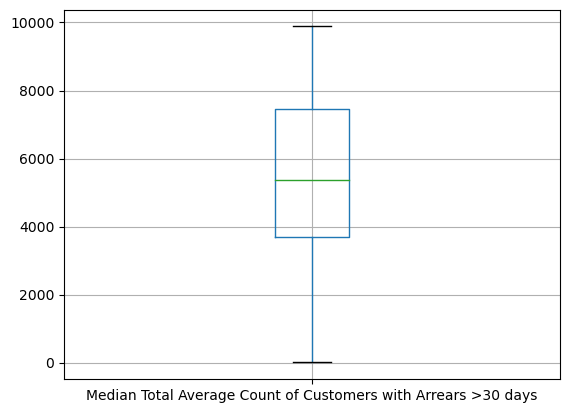

In [22]:
data.boxplot(column="Median Total Average Count of Customers with Arrears >30 days")  #Check for extreme values  
plt.show()

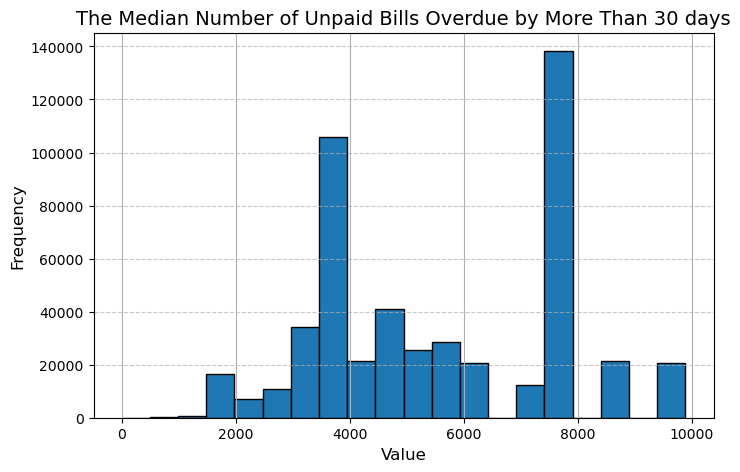

In [23]:
# Plot histogram
plt.figure(figsize=(8, 5))  # Set figure size
data["Median Total Average Count of Customers with Arrears >30 days"].hist(bins=20, edgecolor="black")  # Add bin edges for clarity

# Add labels and title
plt.xlabel("Value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("The Median Number of Unpaid Bills Overdue by More Than 30 days", fontsize=14)

# Show grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Display plot
plt.show()

In [24]:
# Create a new DataFrame with only rows where "Approximate Location" is "Hayward"
data_hayward = data[data["Approximate Location"] == "Hayward"].copy()
data_hayward

,ZIP,Native American (%),Asian American (%),African American (%),Elderly > 64 years (%),Children < 10 years (%),Hispanic (%),White (%),Pop 10-64 years (%),Total Population,...,Average Outage Duration (hours),Average Household Impacted Per Event,Outage Frequency Per Year,Projected Number of Extreme Heat Day,Census Tract Median Income,Percent of Tract below 200% Federal Poverty Level,Mean Total Average Count of Customers with Arrears >30 days,Median Total Average Count of Customers with Arrears >30 days,Mean Average Count of CARE/FERA Customers with Arrears >30 days,Mean Average Count of NON-CARE/FERA Customers with Arrears >30 days
102658,94541,0.24,23.78,19.77,16.89,11.57,27.39,22.41,71.54,6745,...,41.0,2.0,0.2,15,61179.0,NaN,7601.75,6161.5,3547.0,4054.75
102659,94541,0.24,23.78,19.77,16.89,11.57,27.39,22.41,71.54,6745,...,41.0,2.0,0.2,15,61179.0,NaN,7601.75,6161.5,3547.0,4054.75
102660,94541,0.24,23.78,19.77,16.89,11.57,27.39,22.41,71.54,6745,...,41.0,2.0,0.2,15,61179.0,NaN,7601.75,6161.5,3547.0,4054.75
102661,94541,0.24,23.78,19.77,16.89,11.57,27.39,22.41,71.54,6745,...,41.0,2.0,0.2,15,61179.0,NaN,7601.75,6161.5,3547.0,4054.75
102662,94541,0.24,23.78,19.77,16.89,11.57,27.39,22.41,71.54,6745,...,41.0,2.0,0.2,15,61179.0,NaN,7601.75,6161.5,3547.0,4054.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320307,94588,0.08,62.94,4.63,6.93,15.84,7.39,20.70,77.23,3641,...,46.0,249.0,0.6,17,239094.0,NaN,3395.50,2816.0,683.0,2712.50
320308,94588,0.08,62.94,4.63,6.93,15.84,7.39,20.70,77.23,3641,...,46.0,249.0,0.6,17,239094.0,NaN,3395.50,2816.0,683.0,2712.50
320309,94588,0.08,62.94,4.63,6.93,15.84,7.39,20.70,77.23,3641,...,46.0,249.0,0.6,17,239094.0,NaN,3395.50,2816.0,683.0,2712.50
320310,94588,0.08,62.94,4.63,6.93,15.84,7.39,20.70,77.23,3641,...,46.0,249.0,0.6,17,239094.0,NaN,3395.50,2816.0,683.0,2712.50


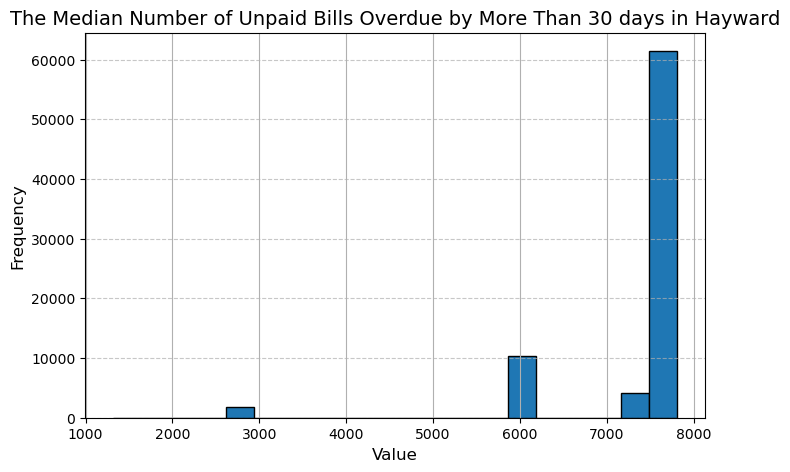

In [25]:
# Plot histogram
plt.figure(figsize=(8, 5))  # Set figure size
data_hayward["Median Total Average Count of Customers with Arrears >30 days"].hist(bins=20, edgecolor="black")  # Add bin edges for clarity

# Add labels and title
plt.xlabel("Value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("The Median Number of Unpaid Bills Overdue by More Than 30 days in Hayward", fontsize=14)

# Show grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Display plot
plt.show()

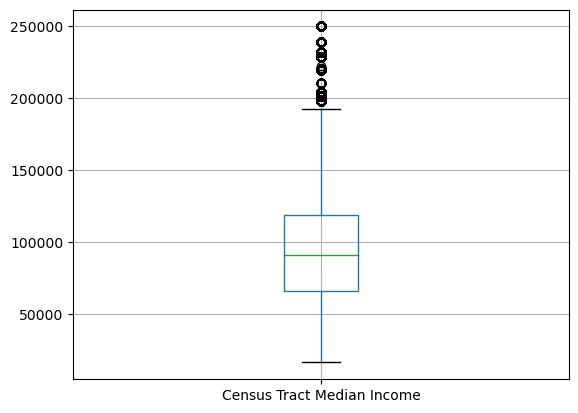

In [26]:
data.boxplot(column="Census Tract Median Income")  #Check for extreme values  
plt.show()

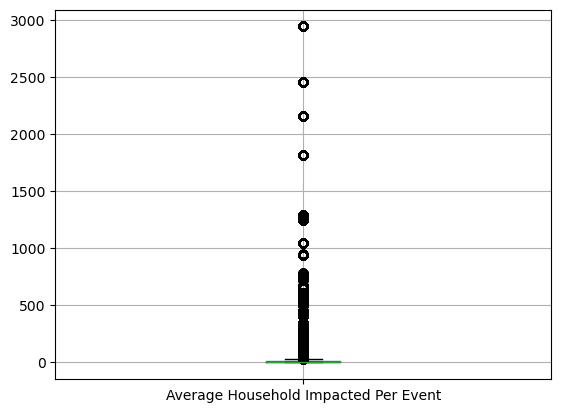

In [27]:
data.boxplot(column="Average Household Impacted Per Event")  #Check for extreme values  
plt.show()

In [28]:
# Define a function to classify communities
def classify_location(location):
    if "Unincorporated" in str(location):
        return "Unincorporated"
    else:
        return "Incorporated"

In [34]:
# Apply the classification to create a new column
PSE_outage["Community Type"] = PSE_outage["Approximate Location"].apply(classify_location)
PSE_outage.columns = PSE_outage.columns.str.strip()


In [35]:
# Group data and calculate median arrears
grouped_median = PSE_outage.groupby("Community Type")["Median Total Average Count of Customers with Arrears >30 days"].median()
print("Median of Arrears >30 Days by Community Type:")
print(grouped_median)

Median of Arrears >30 Days by Community Type:
Community Type
Incorporated      5365.0
Unincorporated    3612.0
Name: Median Total Average Count of Customers with Arrears >30 days, dtype: float64


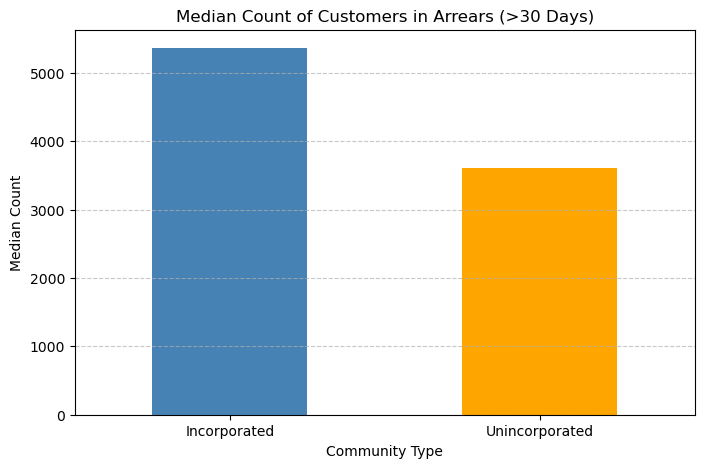

In [36]:
# Plot bar chart for median comparison
grouped_median.plot(kind='bar', color=['steelblue', 'orange'])
plt.title("Median Count of Customers in Arrears (>30 Days)")
plt.ylabel("Median Count")
plt.xlabel("Community Type")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [39]:
print(PSE_outage.columns.tolist())
print(PSE_outage[["Approximate Location"]].head())
print(PSE_outage.head())

['ZIP', 'Native American (%)', 'Asian American (%)', 'African American (%)', 'Elderly > 64 years (%)', 'Children < 10 years (%)', 'Hispanic (%)', 'White (%)', 'Pop 10-64 years (%)', 'Total Population', 'Approximate Location', 'California County', 'PM2.5', 'CES 4.0 Score', 'Drinking Water', 'Asthma', 'Cardiovascular Disease', 'Unemployment', 'Linguistic Isolation', 'Housing Burden', 'Education', 'Poverty', 'Average Outage Duration (hours)', 'Average Household Impacted Per Event', 'Outage Frequency Per Year', 'Projected Number of Extreme Heat Day', 'Census Tract Median Income', 'Percent of Tract below 200% Federal Poverty Level', 'Mean Total Average Count of Customers with Arrears >30 days', 'Median Total Average Count of Customers with Arrears >30 days', 'Mean Average Count of CARE/FERA Customers with Arrears >30 days', 'Mean Average Count of NON-CARE/FERA Customers with Arrears >30 days', 'Community Type']
  Approximate Location
0              Alameda
1              Alameda
2          

<Figure size 800x500 with 0 Axes>

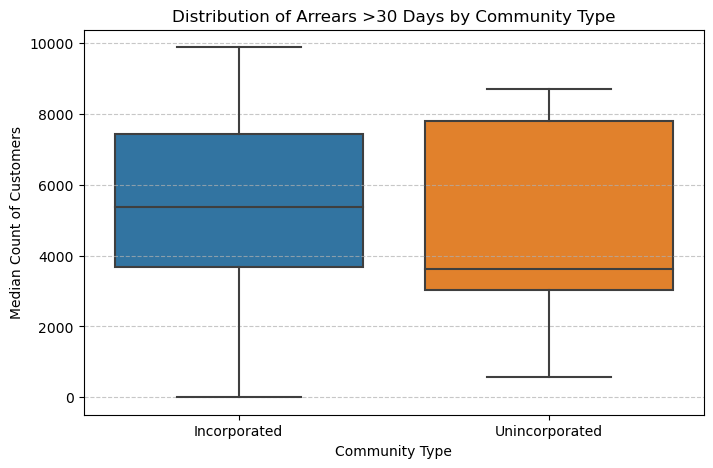

In [40]:
# Drop rows with NaNs in key columns
plot_PSE_outage = PSE_outage[["Community Type", "Median Total Average Count of Customers with Arrears >30 days"]].dropna()

# Then plot
plt.figure(figsize=(8, 5))
sns.boxplot(
    x="Community Type", 
    y="Median Total Average Count of Customers with Arrears >30 days", 
    data=plot_PSE_outage
)
plt.title("Distribution of Arrears >30 Days by Community Type")
plt.ylabel("Median Count of Customers")
plt.xlabel("Community Type")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

